<a href="https://colab.research.google.com/github/sejal2229/sejal2229/blob/main/age_gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np # linear algebra
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Dropout, LayerNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [18]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [19]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [20]:
!kaggle datasets download -d ttungl/adience-benchmark-gender-and-age-classification

100% 1.38G/1.39G [00:13<00:00, 129MB/s]
100% 1.39G/1.39G [00:13<00:00, 110MB/s]


In [21]:
import zipfile
def unzip_data(filename):
    zip_ref = zipfile.ZipFile(filename, "r")
    zip_ref.extractall()
    zip_ref.close()

In [22]:
unzip_data('/content/gdrive/MyDrive/Kaggle/adience-benchmark-gender-and-age-classification.zip')

In [23]:
df = pd.read_csv("/content/gdrive/MyDrive/Kaggle/AdienceBenchmarkGenderAndAgeClassification/fold_0_data.txt",sep = "\t" )
df1 = pd.read_csv("/content/gdrive/MyDrive/Kaggle/AdienceBenchmarkGenderAndAgeClassification/fold_1_data.txt",sep = "\t")
df2 = pd.read_csv("/content/gdrive/MyDrive/Kaggle/AdienceBenchmarkGenderAndAgeClassification/fold_2_data.txt",sep = "\t")
df3 = pd.read_csv("/content/gdrive/MyDrive/Kaggle/AdienceBenchmarkGenderAndAgeClassification/fold_3_data.txt",sep = "\t")
df4 = pd.read_csv("/content/gdrive/MyDrive/Kaggle/AdienceBenchmarkGenderAndAgeClassification/fold_4_data.txt",sep = "\t")

In [24]:
df.head()

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34


In [25]:
df1.head()

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,114841417@N06,12068804204_085d553238_o.jpg,481,"(60, 100)",f,1141,780,975,976,0,0,118
1,114841417@N06,12068804204_085d553238_o.jpg,482,"(48, 53)",m,1821,283,969,969,-25,15,35
2,114841417@N06,12078357226_5fdd9367de_o.jpg,483,"(4, 6)",f,1788,341,306,306,-10,0,168
3,114841417@N06,12019067874_0e988248af_o.jpg,483,"(4, 6)",f,3,183,932,777,-115,0,27
4,114841417@N06,12077009614_2490487d2a_o.jpg,484,45,f,258,133,1734,1734,15,0,11


In [26]:
df2.head()

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,64504106@N06,11831304783_488d6c3a6d_o.jpg,911,"(0, 2)",m,438,914,605,606,-90,0,123
1,64504106@N06,11849646776_35253e988f_o.jpg,911,"(0, 2)",m,19,712,1944,1736,-105,0,86
2,64504106@N06,11848166326_57b03f535e_o.jpg,911,"(0, 2)",m,382,680,1785,1768,-80,0,14
3,64504106@N06,11812546385_bb4d020dde_o.jpg,911,"(0, 2)",m,608,948,893,892,-105,0,8
4,64504106@N06,11831118625_81dcc72e75_o.jpg,912,"(38, 43)",m,23,150,508,508,-90,0,79


In [27]:
df3.head()

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,113445054@N07,11763777465_11d01c34ce_o.jpg,1322,"(25, 32)",m,1102,296,357,357,-15,0,59
1,113445054@N07,11763777465_11d01c34ce_o.jpg,1323,"(25, 32)",f,1713,580,325,325,-5,0,118
2,113445054@N07,11763777465_11d01c34ce_o.jpg,1324,"(15, 20)",f,1437,664,306,306,5,0,109
3,113445054@N07,11764005785_f21921aea6_o.jpg,1325,"(25, 32)",f,978,229,803,803,-20,-45,16
4,113445054@N07,11763728674_a41d99f71e_o.jpg,1326,"(25, 32)",m,1745,910,242,242,-10,0,55


In [28]:
df4.head()

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,115321157@N03,12111738395_a7f715aa4e_o.jpg,1744,"(4, 6)",m,663,997,637,638,-95,0,129
1,115321157@N03,12112413505_0aea8e17c6_o.jpg,1745,"(48, 53)",m,505,846,433,433,-95,0,72
2,115321157@N03,12112392255_995532c2f0_o.jpg,1744,"(4, 6)",m,517,1185,383,383,0,0,70
3,115321157@N03,12112392255_995532c2f0_o.jpg,1746,"(25, 32)",m,2247,688,376,376,0,30,67
4,115321157@N03,12112392255_995532c2f0_o.jpg,1747,"(25, 32)",m,1421,667,325,325,0,0,102


In [29]:
final_df = pd.concat([df, df1, df2, df3, df4], ignore_index=True)

In [30]:
final_df.shape

(19370, 12)

In [31]:
final_df.head()

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34


In [32]:
final_df.describe()

,face_id,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
count,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000
mean,1023.858906,949.670212,675.659370,633.042437,629.692463,-12.405111,3.128549,72.266598
std,645.385251,667.060150,429.918002,440.409036,426.296233,73.430214,15.658667,38.799247
min,1.000000,0.000000,0.000000,80.000000,80.000000,-205.000000,-45.000000,5.000000
25%,486.000000,441.250000,333.000000,324.000000,325.000000,-80.000000,0.000000,42.000000
50%,980.000000,852.000000,653.000000,517.000000,517.000000,-5.000000,0.000000,70.000000
75%,1526.000000,1359.000000,964.000000,778.000000,778.000000,5.000000,0.000000,98.000000
max,2284.000000,10024.000000,2752.000000,3264.000000,3225.000000,365.000000,45.000000,221.000000


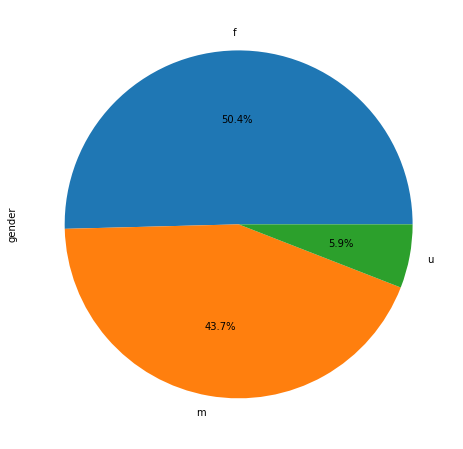

f    9372
m    8120
u    1099
Name: gender, dtype: int64

In [33]:
#pie_graph to present gender
plt.figure(1, figsize=(8,8))
final_df.gender.value_counts().plot.pie(autopct="%1.1f%%")
plt.show()
final_df.gender.value_counts()

In [34]:
from collections import Counter

In [35]:
c = Counter(final_df.gender)
dict(c)

{'f': 9372, 'm': 8120, nan: 779, 'u': 1099}

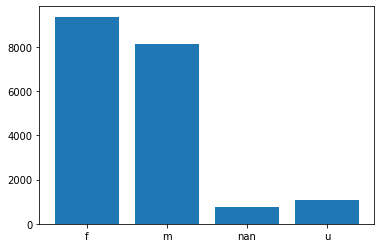

In [36]:
plt.bar(range(len(c)), list(c.values()), align='center')
plt.xticks(range(len(c)), list(c.keys()));

In [37]:
age = [('(0, 2)', '0-2'), ('2', '0-2'), ('3', '0-2'), ('(4, 6)', '4-6'), ('(8, 12)', '8-13'), ('13', '8-13'), ('22', '15-20'), ('(8, 23)','15-20'), ('23', '25-32'), ('(15, 20)', '15-20'), ('(25, 32)', '25-32'), ('(27, 32)', '25-32'), ('32', '25-32'), ('34', '25-32'), ('29', '25-32'), ('(38, 42)', '38-43'), ('35', '38-43'), ('36', '38-43'), ('42', '48-53'), ('45', '38-43'), ('(38, 43)', '38-43'), ('(38, 42)', '38-43'), ('(38, 48)', '48-53'), ('46', '48-53'), ('(48, 53)', '48-53'), ('55', '48-53'), ('56', '48-53'), ('(60, 100)', '60+'), ('57', '60+'), ('58', '60+')]

In [38]:
final_df.age.value_counts()

(25, 32)     5004
(0, 2)       2488
(38, 43)     2293
(4, 6)       2140
(8, 12)      2124
(15, 20)     1642
(60, 100)     872
(48, 53)      830
None          748
35            293
13            168
22            149
34            105
23             96
45             88
(27, 32)       77
55             76
36             56
(38, 42)       46
57             24
3              18
29             11
(38, 48)        6
58              5
32              3
2               3
56              2
42              1
46              1
(8, 23)         1
Name: age, dtype: int64

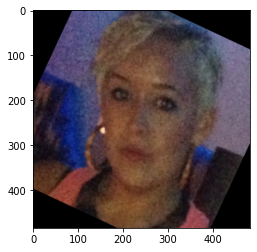

In [39]:
img_path = "/content/gdrive/MyDrive/Kaggle/AdienceBenchmarkGenderAndAgeClassification/faces/"+final_df.user_id.loc[8]+"/coarse_tilt_aligned_face."+str(final_df.face_id.loc[8])+"."+final_df.original_image.loc[8]
img = load_img(img_path)
plt.imshow(img)
plt.show()

In [40]:
new_df = final_df[['age', 'gender', 'x', 'y', 'dx', 'dy']].copy()

In [41]:
img_path = []
for i in final_df.iterrows():
    path = "/content/gdrive/MyDrive/Kaggle/AdienceBenchmarkGenderAndAgeClassification/faces/"+i[1].user_id+"/coarse_tilt_aligned_face."+str(i[1].face_id)+"."+i[1].original_image
    img_path.append(path)

new_df['img_path'] = img_path

In [42]:
new_df.head()

,age,gender,x,y,dx,dy,img_path
0,"(25, 32)",f,0,414,1086,1383,/content/gdrive/MyDrive/Kaggle/AdienceBenchmar...
1,"(25, 32)",m,301,105,640,641,/content/gdrive/MyDrive/Kaggle/AdienceBenchmar...
2,"(25, 32)",f,2395,876,771,771,/content/gdrive/MyDrive/Kaggle/AdienceBenchmar...
3,"(25, 32)",m,752,1255,484,485,/content/gdrive/MyDrive/Kaggle/AdienceBenchmar...
4,"(25, 32)",m,175,80,769,768,/content/gdrive/MyDrive/Kaggle/AdienceBenchmar...


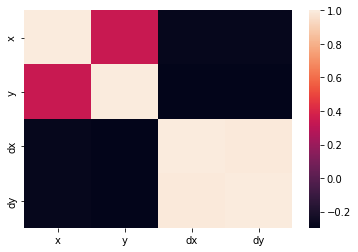

In [43]:
sns.heatmap(new_df.corr());

In [44]:
age_map = [('(0, 2)', '0-2'), ('2', '0-2'), ('3', '0-2'), ('(4, 6)', '4-6'), ('(8, 12)', '8-13'), ('13', '8-13'), ('22', '15-20'), ('(8, 23)','15-20'), ('23', '25-32'), ('(15, 20)', '15-20'), ('(25, 32)', '25-32'), ('(27, 32)', '25-32'), ('32', '25-32'), ('34', '25-32'), ('29', '25-32'), ('(38, 42)', '38-43'), ('35', '38-43'), ('36', '38-43'), ('42', '48-53'), ('45', '38-43'), ('(38, 43)', '38-43'), ('(38, 42)', '38-43'), ('(38, 48)', '48-53'), ('46', '48-53'), ('(48, 53)', '48-53'), ('55', '48-53'), ('56', '48-53'), ('(60, 100)', '60+'), ('57', '60+'), ('58', '60+')]

age_map_dict = {i[0]: i[1] for i in age_map}
drop_labels = []
for idx, i in enumerate(new_df.age):
    if i == 'None':
        drop_labels.append(idx)
    else:
        new_df.age.loc[idx] = age_map_dict[i]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [45]:
new_df = new_df.drop(labels=drop_labels, axis=0)

In [46]:
new_df.head()

,age,gender,x,y,dx,dy,img_path
0,25-32,f,0,414,1086,1383,/content/gdrive/MyDrive/Kaggle/AdienceBenchmar...
1,25-32,m,301,105,640,641,/content/gdrive/MyDrive/Kaggle/AdienceBenchmar...
2,25-32,f,2395,876,771,771,/content/gdrive/MyDrive/Kaggle/AdienceBenchmar...
3,25-32,m,752,1255,484,485,/content/gdrive/MyDrive/Kaggle/AdienceBenchmar...
4,25-32,m,175,80,769,768,/content/gdrive/MyDrive/Kaggle/AdienceBenchmar...


In [47]:
new_df = new_df.dropna()

In [48]:
df_final = new_df[new_df.gender != 'u'].copy()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17452 entries, 0 to 19345
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       17452 non-null  object
 1   gender    17452 non-null  object
 2   x         17452 non-null  int64 
 3   y         17452 non-null  int64 
 4   dx        17452 non-null  int64 
 5   dy        17452 non-null  int64 
 6   img_path  17452 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.1+ MB


In [49]:
genderToLabelMap = {
    'f' : 0,
    'm' : 1
}

#labeling age
ageToLabelMap = {
    '0-2'  :0,
    '4-6'  :1,
    '8-13' :2,
    '15-20':3,
    '25-32':4,
    '38-43':5,
    '48-53':6,
    '60+'  :7
}

labelToAgeMap = {value: key for key, value in ageToLabelMap.items()}
labelToGenderMap = {value: key for key, value in genderToLabelMap.items()}

In [50]:
df_final['age'] = df_final['age'].apply(lambda age: ageToLabelMap[age])
df_final['gender'] = df_final['gender'].apply(lambda g: genderToLabelMap[g])

df_final.head()

,age,gender,x,y,dx,dy,img_path
0,4,0,0,414,1086,1383,/content/gdrive/MyDrive/Kaggle/AdienceBenchmar...
1,4,1,301,105,640,641,/content/gdrive/MyDrive/Kaggle/AdienceBenchmar...
2,4,0,2395,876,771,771,/content/gdrive/MyDrive/Kaggle/AdienceBenchmar...
3,4,1,752,1255,484,485,/content/gdrive/MyDrive/Kaggle/AdienceBenchmar...
4,4,1,175,80,769,768,/content/gdrive/MyDrive/Kaggle/AdienceBenchmar...


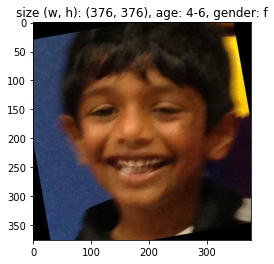

In [51]:
def show_img(file, age, gen):
    img = Image.open(file)
    plt.imshow(img)
    plt.title(f'size (w, h): {img.size}, age: {age}, gender: {gen}')
    plt.show()
    
idx = np.random.randint(df_final.shape[0])
fname = df_final['img_path'].iloc[idx]
age = labelToAgeMap[df_final['age'][idx]]
gender = labelToGenderMap[df_final['gender'][idx]]
show_img(fname, age, gender)

In [52]:
X = df_final[['img_path']]
y = df_final[['gender']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Training data shape {X_train.shape}')
print(f'Testing data shape {X_test.shape}')

Training data shape (12216, 1)
Testing data shape (5236, 1)


In [53]:
train_images = []
test_images = []

for row in X_train.iterrows():
    img = Image.open(row[1].img_path)
    img = img.resize((256, 256))   # Resize the image
    data = np.asarray(img)
    train_images.append(data)

for row in X_test.iterrows(): 
    img = Image.open(row[1].img_path)
    img = img.resize((256, 256))  # Resize the image
    data = np.asarray(img)
    test_images.append(data)

train_images = np.asarray(train_images)
test_images = np.asarray(test_images)

print(f'Train images shape {train_images.shape}')
print(f'Test images shape {test_images.shape}')

Train images shape (12216, 256, 256, 3)
Test images shape (5236, 256, 256, 3)


In [54]:
model = Sequential()
model.add(tf.keras.layers.Conv2D(input_shape=(256, 256, 3), filters=96, kernel_size=(7, 7), strides=(2, 2), padding='valid', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())

model.add(Flatten())
model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 125, 125, 96)      14208     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 96)       0         
 )                                                               
                                                                 
 layer_normalization (LayerN  (None, 62, 62, 96)       192       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 256)      0         
 2D)                                                             
                                                        

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3) # Callback for earlystopping

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

epochs=20
history = model.fit(train_images, y_train, batch_size=32,  epochs=epochs, validation_data=(test_images, y_test), callbacks=[callback])

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


382/382 [==============================] - ETA: 0s - loss: 0.9463 - accuracy: 0.5300

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


382/382 [==============================] - 110s 253ms/step - loss: 0.9463 - accuracy: 0.5300 - val_loss: 0.6920 - val_accuracy: 0.5241
Epoch 2/20
382/382 [==============================] - 93s 245ms/step - loss: 0.6906 - accuracy: 0.5393 - val_loss: 0.6923 - val_accuracy: 0.5241
Epoch 3/20
382/382 [==============================] - 93s 244ms/step - loss: 0.6903 - accuracy: 0.5393 - val_loss: 0.6924 - val_accuracy: 0.5241
Epoch 4/20
382/382 [==============================] - 100s 263ms/step - loss: 0.6902 - accuracy: 0.5393 - val_loss: 0.6924 - val_accuracy: 0.5241
Epoch 5/20
 10/382 [..............................] - ETA: 1:20 - loss: 0.6859 - accuracy: 0.5656

In [ ]:
import pickle
with open('/trainHistoryDict', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

In [ ]:
test_loss, test_acc = model.evaluate(test_images, y_test, verbose=2)
print('Testing accuracy',test_acc)

In [ ]:
model.predict(test_images[:4])
#test_images[:4]
y_test[:4]

In [ ]:
from sklearn.metrics import confusion_matrix
pred = model.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

In [ ]:
from sklearn.metrics import classification_report
CM=classification_report(y_true, pred)
print(CM)

In [ ]:
from sklearn.metrics import r2_score
print('R2 score for gender: ', r2_score(y_true, pred))

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)